<a href="https://colab.research.google.com/github/wrixd/code/blob/main/mlprc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [57]:
df = pd.read_csv('HR_comma_sep.csv')


In [58]:
df.shape

(14999, 10)

In [59]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**exploratory data analysis** 

In [60]:
df.groupby(('salary'))[['left']].sum()

,left
salary,
high,82
low,2172
medium,1317


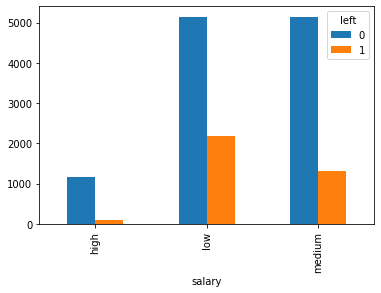

In [61]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

In [62]:
df.groupby(('promotion_last_5years'))[['left']].sum()

,left
promotion_last_5years,
0,3552
1,19


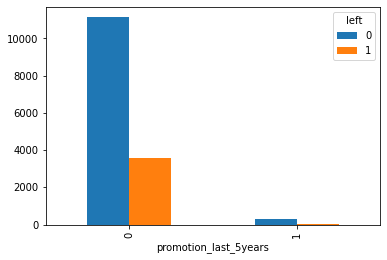

In [63]:
pd.crosstab(df.promotion_last_5years, df.left).plot(kind='bar')

In [64]:
df.groupby('satisfaction_level')[['left']].sum()

,left
satisfaction_level,
0.09,195
0.10,358
0.11,335
0.12,4
0.13,3
...,...
0.96,0
0.97,0
0.98,0


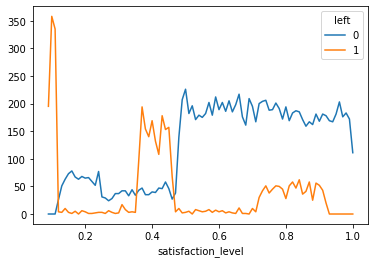

In [65]:
pd.crosstab(df.satisfaction_level, df.left).plot(kind='line')

In [66]:
retained=df[df.left==0]
retained.shape

(11428, 10)

**Plot bar charts showing impact of employee salaries on retention**

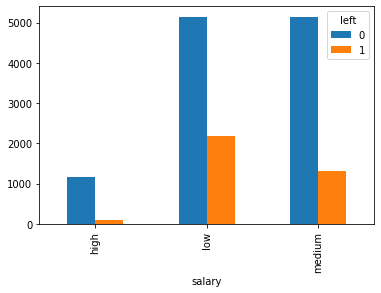

In [67]:
pd.crosstab(df.salary,df.left ).plot(kind='bar')

**Plot bar charts showing corelation between department and employee retention**

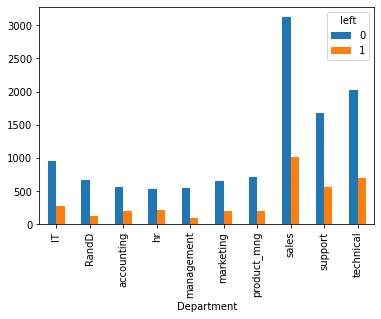

In [68]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

Now build logistic regression model using variables that were narrowed down in step 1

In [69]:
df.corr()['left'].sort_values(ascending = True)

satisfaction_level      -0.388375
Work_accident           -0.154622
promotion_last_5years   -0.061788
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
left                     1.000000
Name: left, dtype: float64

In [70]:
sel_data = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
sel_data.sample(10)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
8220,0.50,166,0,medium
9141,0.70,221,0,low
7190,0.56,244,0,medium
136,0.10,283,0,low
12527,0.09,289,0,low
13743,0.89,144,0,high
7823,0.63,144,0,medium
11434,0.78,202,0,medium
2445,0.77,231,0,medium
3726,0.63,232,0,medium


In [71]:
dummies = pd.get_dummies(sel_data.salary)

In [72]:
data_dummies = pd.concat([sel_data,dummies],axis='columns')

In [73]:
data_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [74]:
data_dummies.drop('salary',axis='columns',inplace=True)
data_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [75]:
X = data_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [76]:
y = df.left

In [77]:

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [78]:

model = LogisticRegression()

In [79]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
print("The accuracy is : ",model.score(X_test,y_test)*100)

The accuracy is :  77.11428571428571
